In [33]:
import pandas as pd

# Step 1: Read the transformed CSV
df = pd.read_csv("transformed_skill_data.csv")

# Step 2: Convert 'day_hour' to datetime
df['day_hour'] = pd.to_datetime(df['day_hour'])

# Step 3: Filter data for the starting time and the latest time for each username
start_time = pd.Timestamp("2024-11-15 12:00:00")
latest_df = df.sort_values(by=['username', 'day_hour']).groupby('username').last()
start_df = df[df['day_hour'] == start_time].set_index('username')

# Step 4: Calculate the experience difference
latest_df = latest_df[['experience_Overall']].rename(columns={'experience_Overall': 'latest_experience'})
start_df = start_df[['experience_Overall']].rename(columns={'experience_Overall': 'start_experience'})
result_df = latest_df.join(start_df)
result_df['experience_diff'] = result_df['latest_experience'] - result_df['start_experience']

# Step 5: Filter and sort the results
result_df = result_df[result_df['experience_diff'] != 0]  # Exclude rows where experience_diff == 0
result_df = result_df.sort_values(by='experience_diff', ascending=False)  # Sort by experience_diff

print(result_df)

#formatted_result_df[['latest_experience', 'start_experience', 'experience_diff']] = result_df[['latest_experience', 'start_experience', 'experience_diff']].applymap(lambda x: f"{x:,}")

#drop columns
#formatted_result_df.reset_index()


# Select 'username' and 'experience_diff', create a copy, and format 'experience_diff' with commas
# Reset the index to ensure 'username' is a regular column
formatted_result_df = result_df.reset_index()[['username', 'experience_diff']].copy()

# Format the 'experience_diff' column with commas and rename it to 'exp gained'
formatted_result_df['exp gained'] = formatted_result_df['experience_diff'].apply(lambda x: f"{x:,}")

# Drop the original 'experience_diff' column
formatted_result_df = formatted_result_df.drop(columns=['experience_diff'])

# Display the formatted DataFrame as Markdown
formatted_result_df = formatted_result_df[['username', 'exp gained']].to_markdown(index=False)
print(formatted_result_df)




# Step 6: Prepare a Markdown table
#markdown_table = result_df[['latest_experience', 'start_experience', 'experience_diff']].reset_index().to_markdown(index=False)

# Step 7: Display the Markdown table
#print(markdown_table)



              latest_experience  start_experience  experience_diff
username                                                          
CloudGiraffe         1087674750        1066214769         21459981
0verheated           1436759210        1419490362         17268848
Puma1                 867086701         853936769         13149932
IROneManClan          210426897         203892489          6534408
Sorow91               777313914         773053184          4260730
YeshuaWins           2003191292        1998999739          4191553
Lady g33k              26979740          24438820          2540920
Mr Siloman             82312821          80015755          2297066
Chibbi                232783803         231586800          1197003
Troubles933            44632474          43531149          1101325
Japouu                175664690         174666465           998225
Zahzr                3858734884        3857872608           862276
SunnyBadBoy          4560374607        4559571855           80

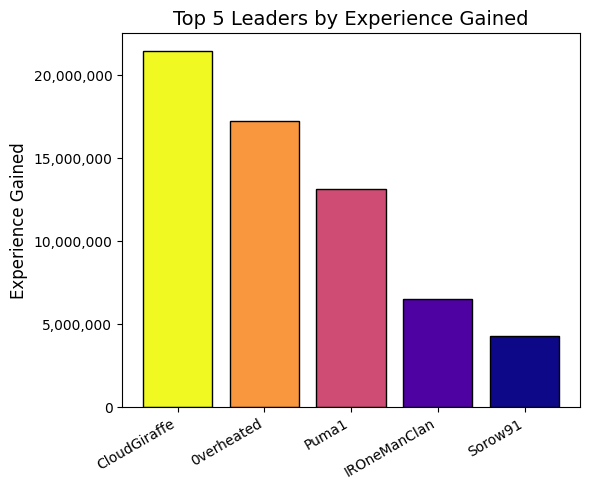

In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import Normalize
import numpy as np

# Sort by 'experience_diff' in descending order and select top 5
top_5 = result_df.nlargest(5, "experience_diff").reset_index()

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(6, 5))

# Normalize the data for the colormap
norm = Normalize(vmin=top_5['experience_diff'].min(), vmax=top_5['experience_diff'].max())
cmap = plt.cm.plasma  # Choose a colormap (e.g., 'plasma', 'viridis', 'coolwarm')

# Assign colors to bars based on their height
colors = cmap(norm(top_5['experience_diff']))

# Plot the bar graph with gradient colors
bars = ax.bar(top_5['username'], top_5['experience_diff'], color=colors, edgecolor='black')

# Add commas to y-axis tick labels
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Set titles and labels
ax.set_title('Top 5 Leaders by Experience Gained', fontsize=14)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Experience Gained', fontsize=12)

# Adjust x-tick labels
plt.xticks(rotation=30, ha='right', fontsize=10)  # Rotate labels at 30 degrees, align to the right

# Add a colorbar to show the gradient scale
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
#cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
#cbar.set_label('Experience Gained', fontsize=12)

plt.tight_layout()
plt.show()
